In [1]:
#Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:

np.random.seed(40)
X = np.random.rand(200, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + 5 * X[:, 3] + 6 * X[:, 4] + np.random.randn(200) * 0.1

In [4]:
from sklearn.model_selection import train_test_split

In [5]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:

from sklearn.linear_model import LinearRegression

In [7]:

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred_linear = reg.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mse = mean_squared_error(y_test, y_pred_linear)
print("Mean squared error:", mse)


Mean squared error: 0.0091973767383111


In [11]:
#Ridge Regression

In [12]:

class RidgeRegression:
    def __init__(self, alpha, iterations):
        self.alpha = alpha
        self.iterations = iterations

    def fit(self, X, y):
        self.n, self.m = X.shape
        self.w = np.zeros(self.m)
        self.b = 0
        for i in range(self.iterations):
            y_pred = np.dot(X, self.w) + self.b
            d_w = (-2 * np.dot(X.T, (y - y_pred)) + 2 * self.alpha * self.w) / self.n
            d_b = -2 * np.sum(y - y_pred) / self.n
            self.w -= self.alpha * d_w
            self.b -= self.alpha * d_b

    def predict(self, X):
        return np.dot(X, self.w) + self.b

In [13]:
np.random.seed(40)
X = np.random.rand(200, 5)
y = 2 * X[:, 0] + 3 * X[:, 1] + 4 * X[:, 2] + 5 * X[:, 3] + 6 * X[:, 4] + np.random.randn(200) * 0.1

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import Ridge

In [16]:
reg = RidgeRegression(alpha=0.1, iterations=1000)
reg.fit(X_train, y_train)

In [17]:

y_pred_ridge = reg.predict(X_test)

In [18]:


mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean squared error:", mse)

Mean squared error: 0.009004544835764128


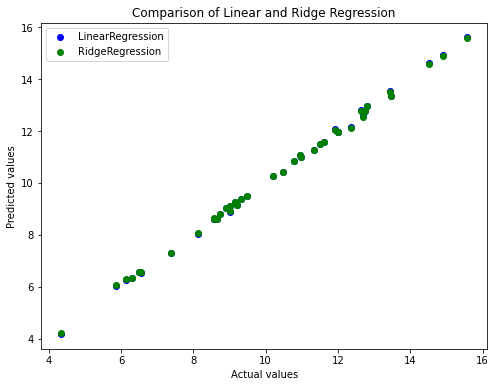

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='LinearRegression')
plt.scatter(y_test, y_pred_ridge, color='green', label='RidgeRegression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Comparison of Linear and Ridge Regression')
plt.legend()
plt.show()
